In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from lazypredict.Supervised import LazyClassifier

In [2]:
childbirth_df = pd.read_csv('datasets/childbirth.csv', sep=';')

In [3]:
childbirth_df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,7047428.00,230440,1,24,1.00,4.00,999992.00,4.00,0.00,...,2.00,3,11012020.00,5.00,0,1,1,5,1,2
1,1,2497654.00,230440,1,21,1.00,3.00,513205.00,3.00,0.00,...,2.00,3,13012020.00,2.00,0,1,1,5,1,3
2,1,2481286.00,230440,1,31,2.00,3.00,999992.00,2.00,0.00,...,5.00,0,14012020.00,3.00,0,1,1,5,1,5
3,1,2497654.00,230440,1,28,2.00,3.00,763015.00,2.00,0.00,...,2.00,3,13012020.00,11.00,0,1,1,4,1,5
4,1,2481286.00,230440,1,18,5.00,3.00,999992.00,2.00,0.00,...,5.00,0,14012020.00,3.00,0,1,1,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40939,1,2651351.00,230440,1,43,2.00,4.00,763010.00,2.00,1.00,...,5.00,0,30122020.00,4.00,0,1,1,4,1,5
40940,1,2497654.00,230440,1,38,1.00,3.00,631010.00,3.00,0.00,...,2.00,3,17012022.00,11.00,0,1,1,4,1,2
40941,1,2651351.00,230440,1,25,5.00,3.00,354705.00,2.00,NaN,...,5.00,0,18012022.00,3.00,0,1,1,3,1,5
40942,1,2497654.00,230440,1,18,2.00,3.00,999992.00,1.00,0.00,...,2.00,3,31012022.00,11.00,0,1,1,5,1,2


In [4]:
childbirth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40944 entries, 0 to 40943
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ORIGEM      40944 non-null  int64  
 1   CODESTAB    40798 non-null  float64
 2   CODMUNNASC  40944 non-null  int64  
 3   LOCNASC     40944 non-null  int64  
 4   IDADEMAE    40944 non-null  int64  
 5   ESTCIVMAE   40198 non-null  float64
 6   ESCMAE      40630 non-null  float64
 7   CODOCUPMAE  38210 non-null  float64
 8   QTDFILVIVO  31964 non-null  float64
 9   QTDFILMORT  26881 non-null  float64
 10  CODMUNRES   40944 non-null  int64  
 11  GESTACAO    39601 non-null  float64
 12  GRAVIDEZ    40837 non-null  float64
 13  PARTO       40887 non-null  float64
 14  CONSULTAS   40944 non-null  int64  
 15  DTNASC      40944 non-null  int64  
 16  HORANASC    40928 non-null  float64
 17  SEXO        40944 non-null  int64  
 18  APGAR1      40752 non-null  float64
 19  APGAR5      40759 non-nul

In [5]:
childbirth_df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK'],
      dtype='object')

<AxesSubplot:>

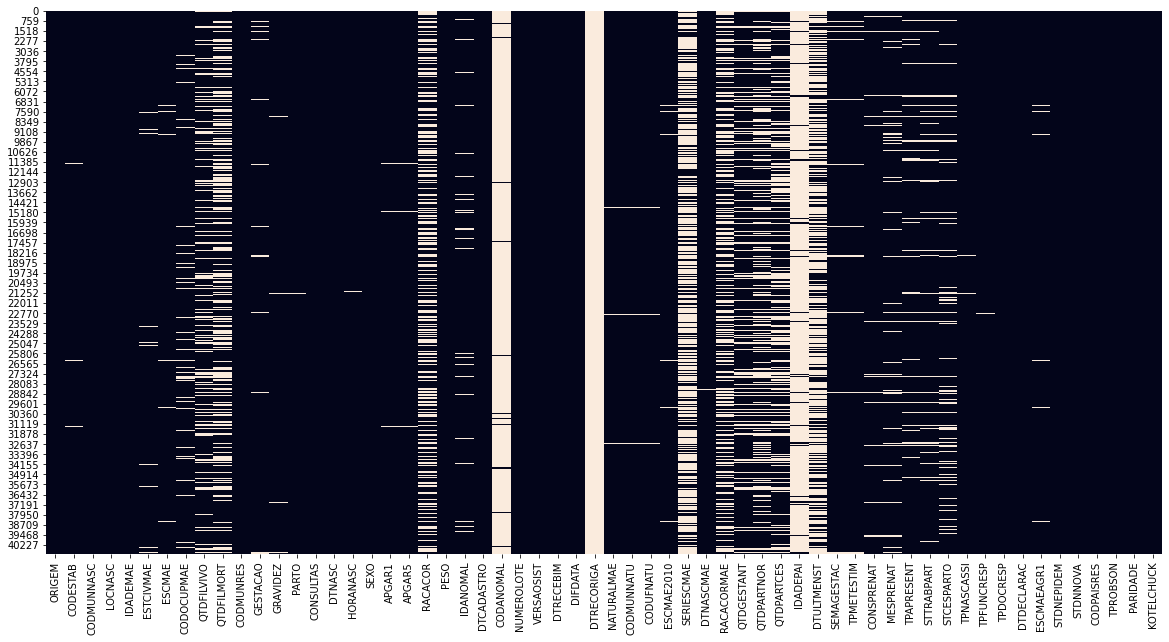

In [6]:
fig, ax = plt.subplots(figsize=(20,10))        
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(childbirth_df.isnull(), cbar = False, ax=ax)

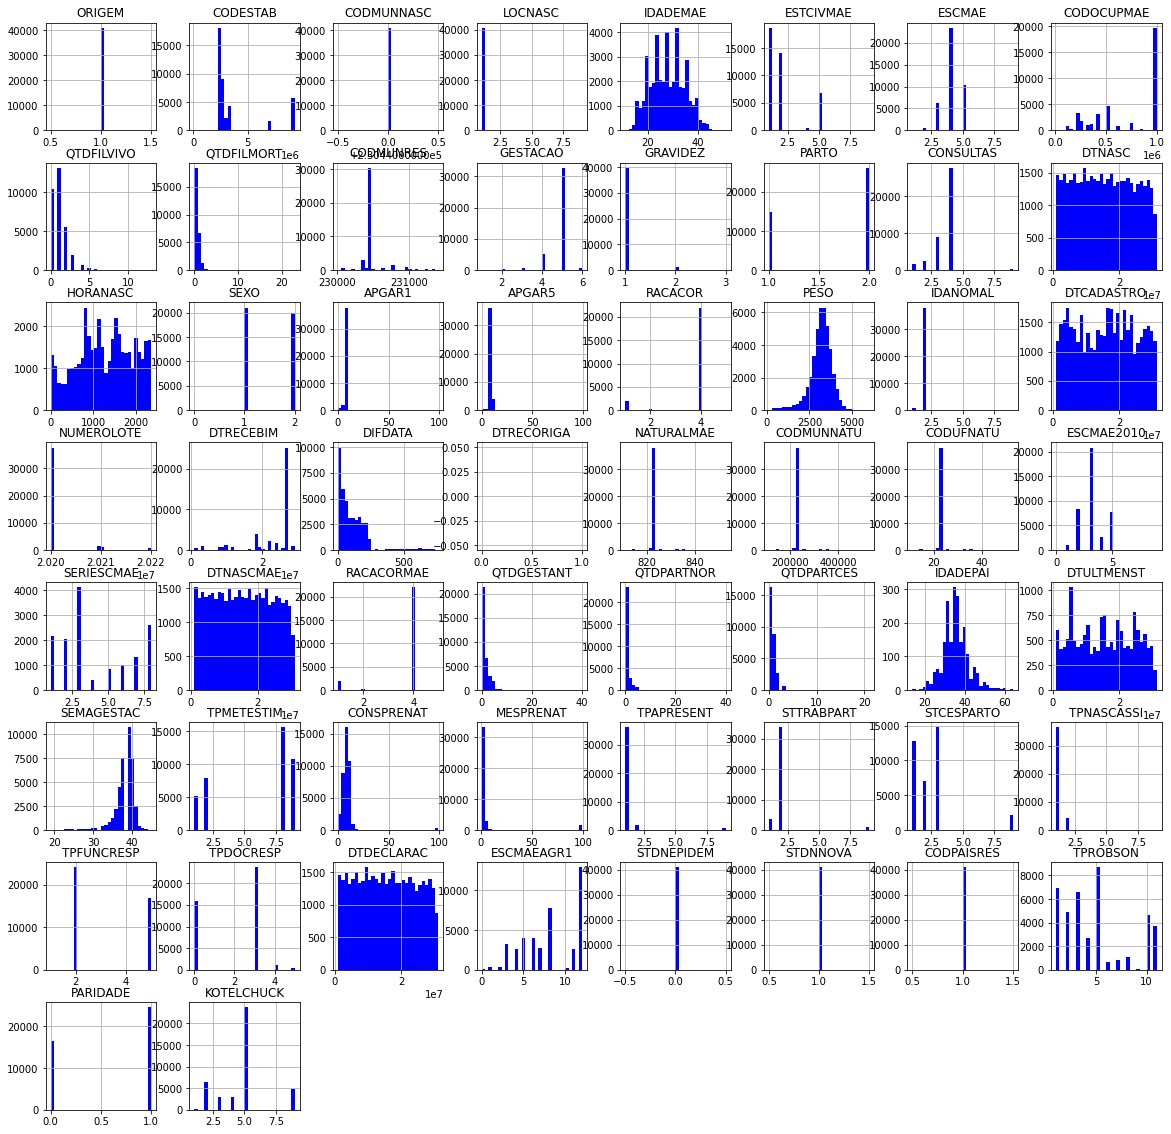

In [7]:
childbirth_df.hist(bins = 30, figsize=(20,20), color = '#03051a');

In [8]:
df = childbirth_df[['CODESTAB', 'ESTCIVMAE', 'CODOCUPMAE', 'CODMUNRES', 'GESTACAO', 
                    'GRAVIDEZ', 'IDADEMAE', 'CONSULTAS', 'PESO',
                    'PARTO']]
df

,CODESTAB,ESTCIVMAE,CODOCUPMAE,CODMUNRES,GESTACAO,GRAVIDEZ,IDADEMAE,CONSULTAS,PESO,PARTO
0,7047428.00,1.00,999992.00,231240,5.00,1.00,24,3,3355.00,2.00
1,2497654.00,1.00,513205.00,231000,5.00,1.00,21,2,3264.00,2.00
2,2481286.00,2.00,999992.00,230370,5.00,1.00,31,4,3360.00,2.00
3,2497654.00,2.00,763015.00,230350,5.00,1.00,28,4,3365.00,2.00
4,2481286.00,5.00,999992.00,230440,5.00,1.00,18,2,2465.00,1.00
...,...,...,...,...,...,...,...,...,...,...
40939,2651351.00,2.00,763010.00,230440,5.00,1.00,43,4,3580.00,2.00
40940,2497654.00,1.00,631010.00,230440,5.00,1.00,38,2,4250.00,2.00
40941,2651351.00,5.00,354705.00,230370,5.00,1.00,25,4,3745.00,1.00
40942,2497654.00,2.00,999992.00,230440,5.00,1.00,18,2,3378.00,2.00


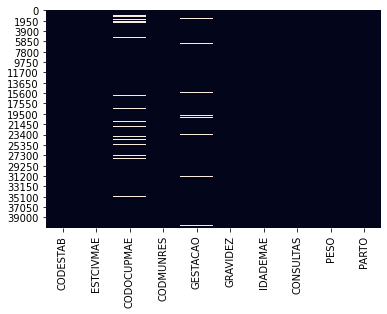

In [9]:
sns.heatmap(df.isnull(), cbar = False);

In [10]:
df = df.dropna().reset_index(drop=True)
df

,CODESTAB,ESTCIVMAE,CODOCUPMAE,CODMUNRES,GESTACAO,GRAVIDEZ,IDADEMAE,CONSULTAS,PESO,PARTO
0,7047428.00,1.00,999992.00,231240,5.00,1.00,24,3,3355.00,2.00
1,2497654.00,1.00,513205.00,231000,5.00,1.00,21,2,3264.00,2.00
2,2481286.00,2.00,999992.00,230370,5.00,1.00,31,4,3360.00,2.00
3,2497654.00,2.00,763015.00,230350,5.00,1.00,28,4,3365.00,2.00
4,2481286.00,5.00,999992.00,230440,5.00,1.00,18,2,2465.00,1.00
...,...,...,...,...,...,...,...,...,...,...
36122,2497654.00,1.00,999992.00,230440,5.00,1.00,15,4,3560.00,1.00
36123,2651351.00,2.00,763010.00,230440,5.00,1.00,43,4,3580.00,2.00
36124,2497654.00,1.00,631010.00,230440,5.00,1.00,38,2,4250.00,2.00
36125,2651351.00,5.00,354705.00,230370,5.00,1.00,25,4,3745.00,1.00


In [11]:
X_cat = df[['CODESTAB', 'ESTCIVMAE', 'CODOCUPMAE', 'CODMUNRES', 'GESTACAO', 'GRAVIDEZ']]
X_cat

,CODESTAB,ESTCIVMAE,CODOCUPMAE,CODMUNRES,GESTACAO,GRAVIDEZ
0,7047428.00,1.00,999992.00,231240,5.00,1.00
1,2497654.00,1.00,513205.00,231000,5.00,1.00
2,2481286.00,2.00,999992.00,230370,5.00,1.00
3,2497654.00,2.00,763015.00,230350,5.00,1.00
4,2481286.00,5.00,999992.00,230440,5.00,1.00
...,...,...,...,...,...,...
36122,2497654.00,1.00,999992.00,230440,5.00,1.00
36123,2651351.00,2.00,763010.00,230440,5.00,1.00
36124,2497654.00,1.00,631010.00,230440,5.00,1.00
36125,2651351.00,5.00,354705.00,230370,5.00,1.00


In [12]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [13]:
X_cat = pd.DataFrame(X_cat)
X_cat.shape

(36127, 813)

In [14]:
X_num = pd.DataFrame(df[['IDADEMAE', 'CONSULTAS', 'PESO']])
X_num

,IDADEMAE,CONSULTAS,PESO
0,24,3,3355.00
1,21,2,3264.00
2,31,4,3360.00
3,28,4,3365.00
4,18,2,2465.00
...,...,...,...
36122,15,4,3560.00
36123,43,4,3580.00
36124,38,2,4250.00
36125,25,4,3745.00


In [15]:
X_all = pd.concat([X_cat, X_num], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,806,807,808,809,810,811,812,IDADEMAE,CONSULTAS,PESO
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,24,3,3355.00
1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,21,2,3264.00
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,31,4,3360.00
3,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,28,4,3365.00
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,18,2,2465.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36122,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,15,4,3560.00
36123,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,43,4,3580.00
36124,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,38,2,4250.00
36125,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,25,4,3745.00


In [16]:
y_orig = df['PARTO']
y_orig

0       2.00
1       2.00
2       2.00
3       2.00
4       1.00
        ... 
36122   1.00
36123   2.00
36124   2.00
36125   1.00
36126   2.00
Name: PARTO, Length: 36127, dtype: float64

In [17]:
y_orig.unique()

array([2., 1.])

0: normal 
1: cesárea

In [18]:
y = y_orig.apply(lambda row: 1 if row == 2. else 0) 
y

0        1
1        1
2        1
3        1
4        0
        ..
36122    0
36123    1
36124    1
36125    0
36126    1
Name: PARTO, Length: 36127, dtype: int64

In [19]:
y.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

1    64.51%
0    35.49%
Name: PARTO, dtype: object

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.2, random_state=0)

In [21]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = forest.predict(X_test)

In [23]:
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [24]:
accuracy_score(y_test, y_pred)

0.6477996125103792

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 939, 1628],
       [ 917, 3742]], dtype=int64)

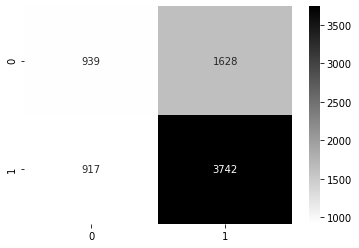

In [26]:
sns.heatmap(cm, annot=True, fmt='g', cmap='binary');

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.37      0.42      2567
           1       0.70      0.80      0.75      4659

    accuracy                           0.65      7226
   macro avg       0.60      0.58      0.59      7226
weighted avg       0.63      0.65      0.63      7226



In [28]:
# clf = LazyClassifier(predictions=True)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

In [29]:
# models

In [30]:
childbirth_subset_df = childbirth_df.drop(['ORIGEM','CODMUNNASC', 'CODANOMAL', 'DTRECORIGA', 
                                           'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'IDADEPAI',
                                           'DTULTMENST', 'SERIESCMAE', 'RACACOR', 'RACACORMAE',
                                           'QTDFILVIVO', 'QTDFILMORT', 'VERSAOSIST'
                                           ], axis = 1)

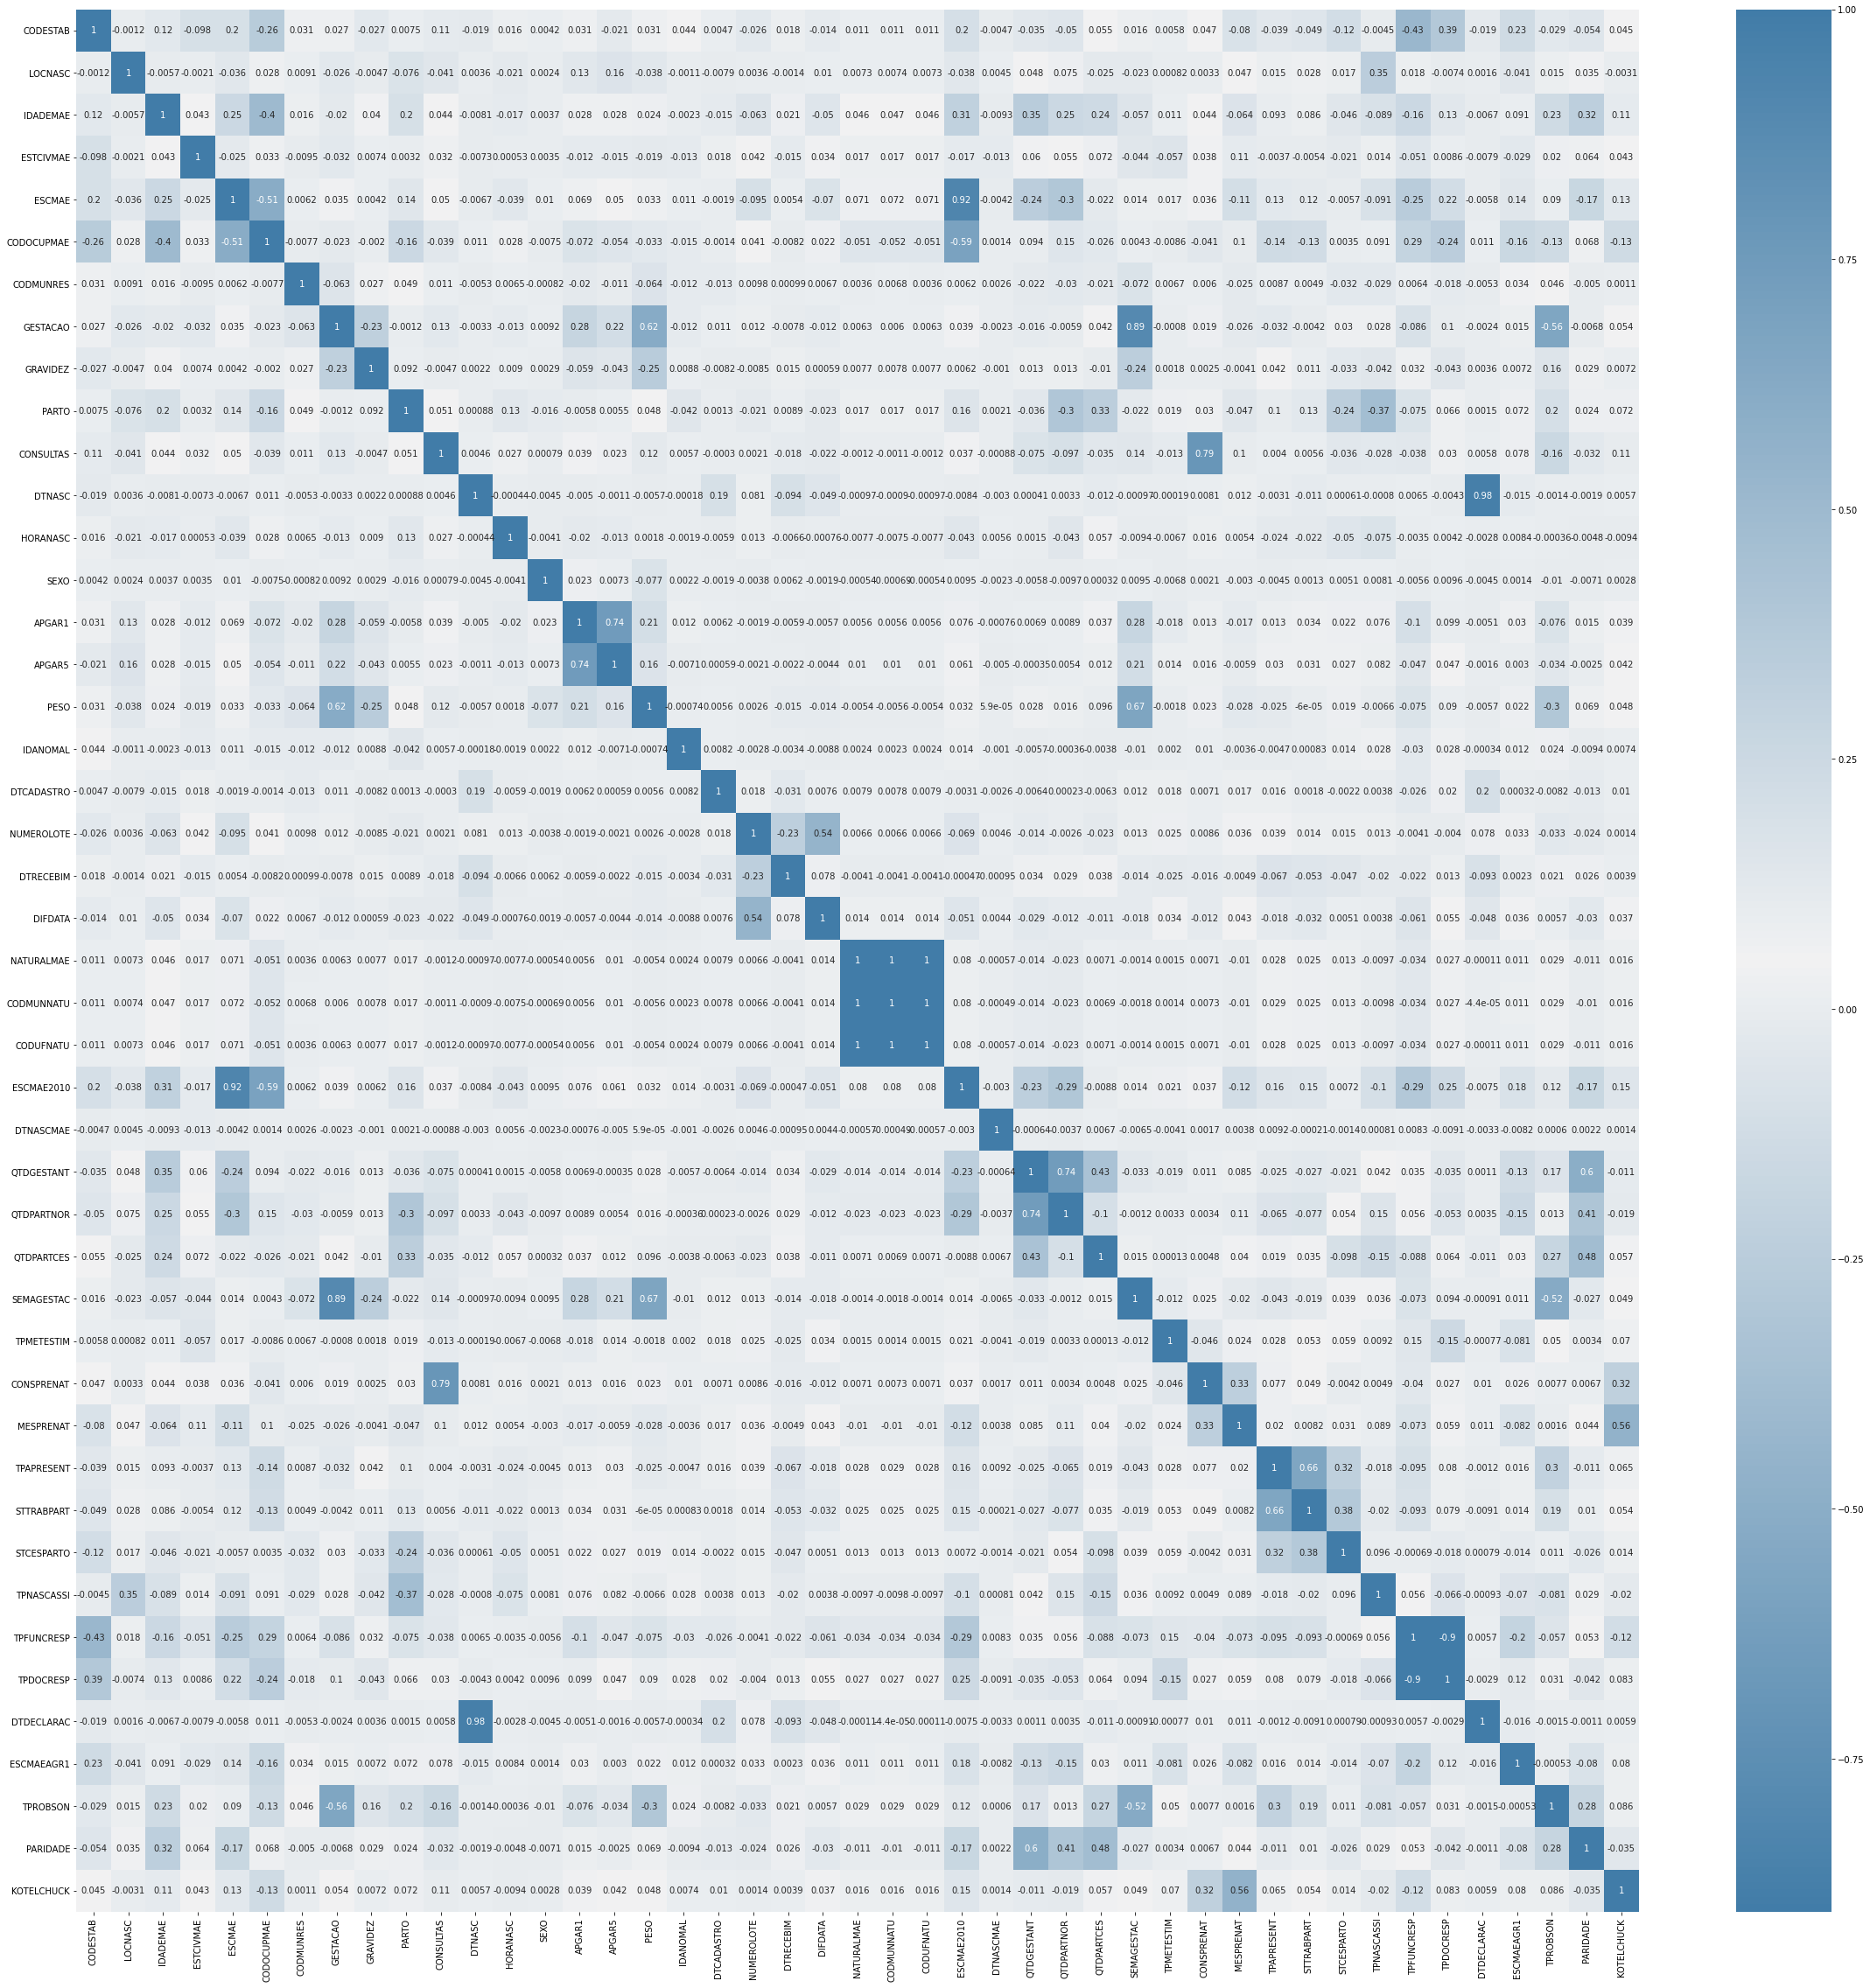

In [31]:
correlations = childbirth_subset_df.corr()
_, ax = plt.subplots(figsize = (40,40))
sns.heatmap(correlations, annot=True, cmap=sns.diverging_palette(240,240, as_cmap=True)); 

In [32]:
childbirth_subset_df['QTDPARTNOR'].fillna(0.00, inplace=True)
childbirth_subset_df['QTDGESTANT'].fillna(0.00, inplace=True)
childbirth_subset_df['QTDPARTCES'].fillna(0.00, inplace=True)

<AxesSubplot:>

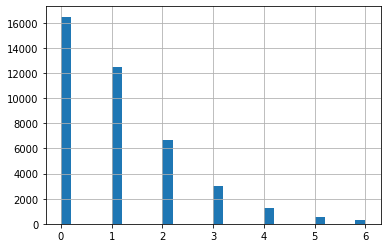

In [33]:
childbirth_subset_df['QTDGESTANT'].hist(bins = 30, range=[0, 6])

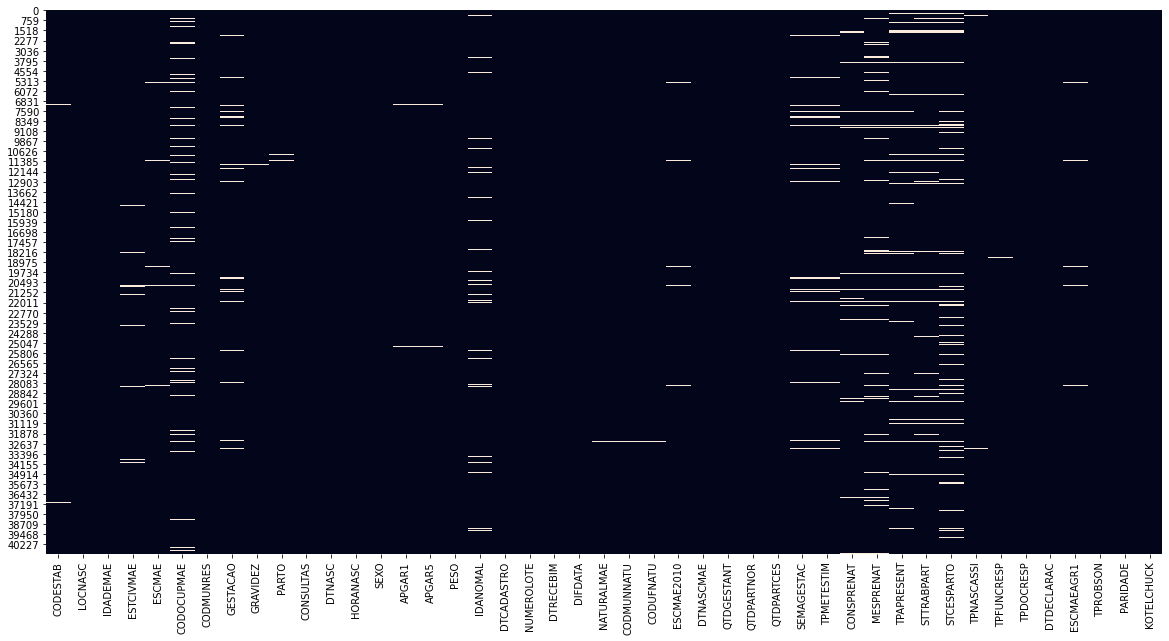

In [34]:
fig, ax = plt.subplots(figsize=(20,10))        
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(childbirth_subset_df.isnull(), cbar = False, ax=ax);

In [35]:
df = childbirth_subset_df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28802 entries, 0 to 28801
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODESTAB    28802 non-null  float64
 1   LOCNASC     28802 non-null  int64  
 2   IDADEMAE    28802 non-null  int64  
 3   ESTCIVMAE   28802 non-null  float64
 4   ESCMAE      28802 non-null  float64
 5   CODOCUPMAE  28802 non-null  float64
 6   CODMUNRES   28802 non-null  int64  
 7   GESTACAO    28802 non-null  float64
 8   GRAVIDEZ    28802 non-null  float64
 9   PARTO       28802 non-null  float64
 10  CONSULTAS   28802 non-null  int64  
 11  DTNASC      28802 non-null  int64  
 12  HORANASC    28802 non-null  float64
 13  SEXO        28802 non-null  int64  
 14  APGAR1      28802 non-null  float64
 15  APGAR5      28802 non-null  float64
 16  PESO        28802 non-null  float64
 17  IDANOMAL    28802 non-null  float64
 18  DTCADASTRO  28802 non-null  int64  
 19  NUMEROLOTE  28802 non-nul

In [36]:
X_data = df[df.columns.difference(['PARTO'])]
y_data = df[['PARTO']]

In [37]:
def show_features(X, y):
    plt.figure(figsize=(20,10))
    plt.bar(x=X, height=y, color='#03051a')
    plt.xticks(rotation='vertical')
    plt.ylabel('F-value')
    plt.title('Compração de F-value')
    plt.show()

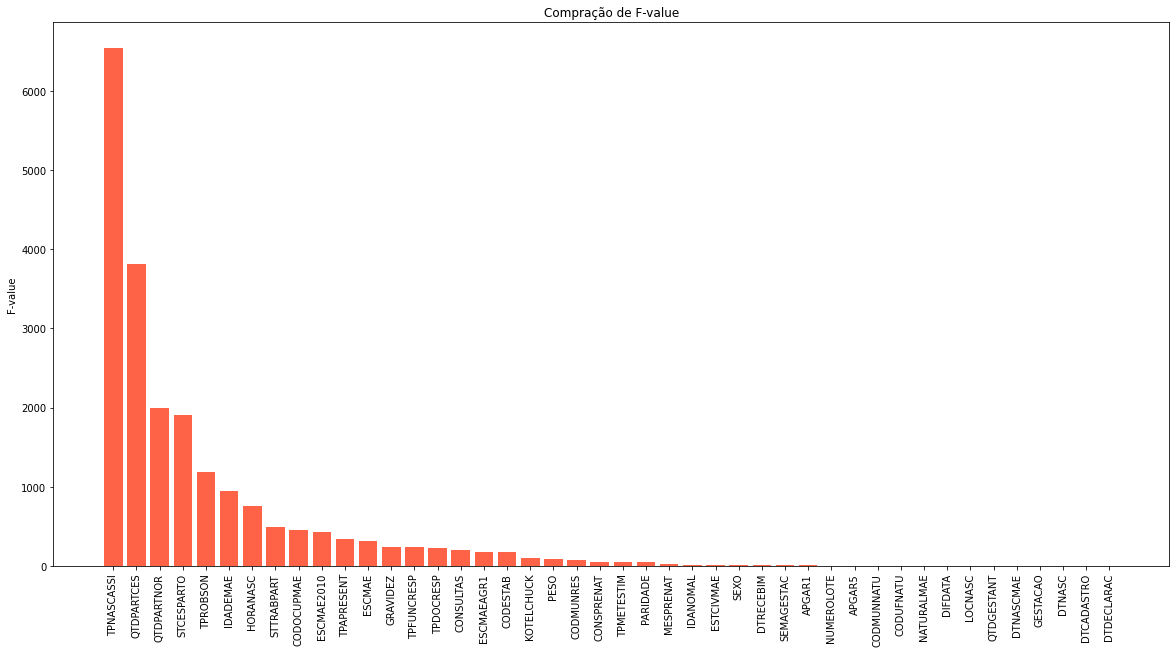

In [38]:
# for feature in zip(X_data.columns, f_value[0]):
#     print(feature)
f_value = f_classif(X_data, y_data)

features = dict(zip(X_data.columns, f_value[0]))
features_sorted = dict(sorted(features.items(), key=lambda item: item[1],reverse=True ))
show_features(features_sorted.keys(), features_sorted.values())

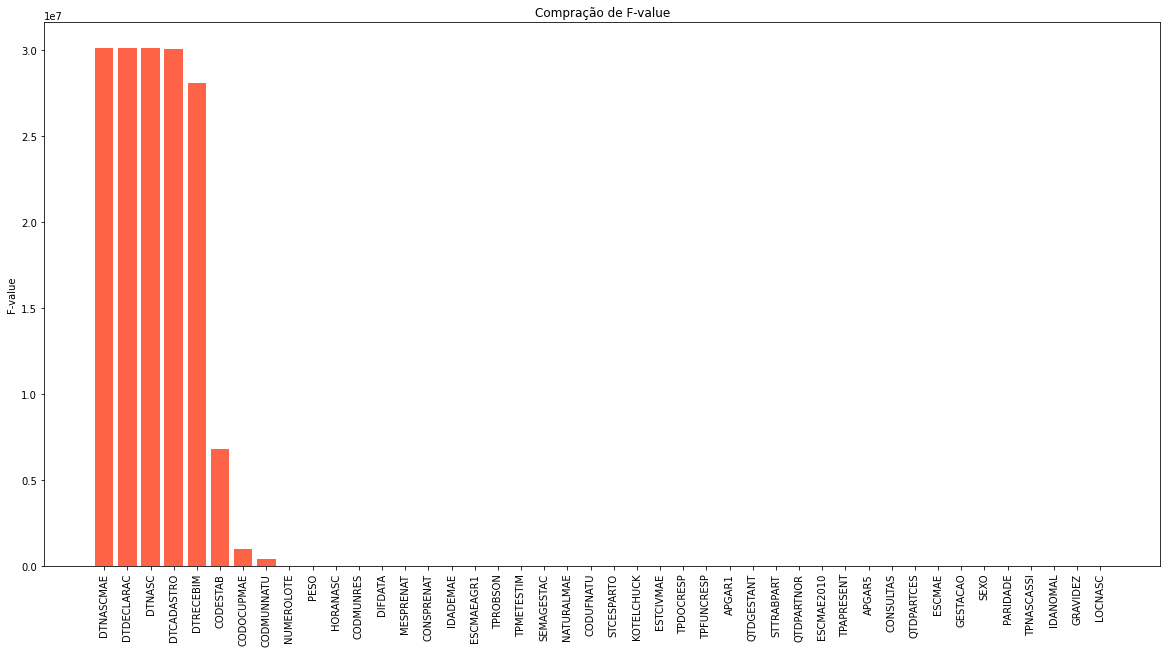

In [39]:
selector = VarianceThreshold()

# Perform variance thresholding
selector.fit_transform(X_data)

# Print the name and variance of each feature
# for feature in zip(X_data.columns, selector.variances_):
#     print(feature)
features = dict(zip(X_data.columns, selector.variances_))
features_sorted = dict(sorted(features.items(), key=lambda item: item[1],reverse=True ))
show_features(features_sorted.keys(), features_sorted.values())

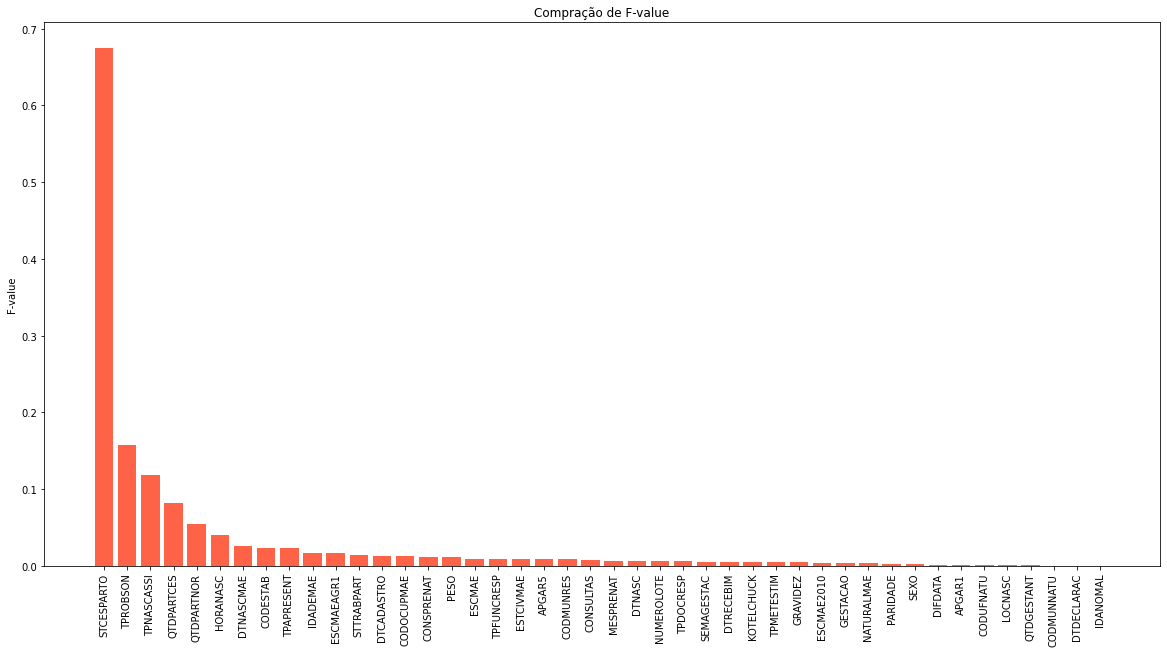

In [40]:
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

features = dict(zip(X_data.columns, MI_score))
features_sorted = dict(sorted(features.items(), key=lambda item: item[1],reverse=True ))
show_features(features_sorted.keys(), features_sorted.values())

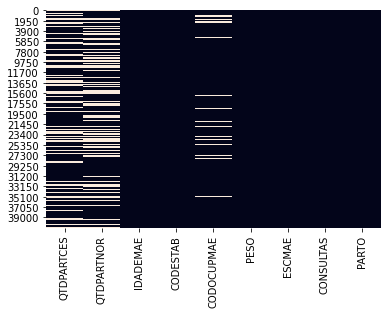

In [41]:
df = childbirth_df[['QTDPARTCES', 'QTDPARTNOR', 'IDADEMAE', 'CODESTAB', 'CODOCUPMAE', 'PESO', 
                    'ESCMAE', 'CONSULTAS', 'PARTO']]
sns.heatmap(df.isnull(), cbar = False);

In [42]:
df['QTDPARTNOR'].fillna(0.00, inplace=True)
df['QTDPARTCES'].fillna(0.00, inplace=True)

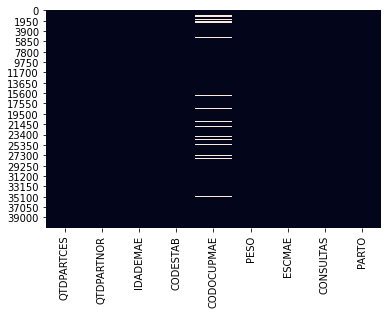

In [43]:
sns.heatmap(df.isnull(), cbar = False);

In [44]:
df = df.dropna().reset_index(drop=True)
df

,QTDPARTCES,QTDPARTNOR,IDADEMAE,CODESTAB,CODOCUPMAE,PESO,ESCMAE,CONSULTAS,PARTO
0,1.00,2.00,24,7047428.00,999992.00,3355.00,4.00,3,2.00
1,1.00,2.00,21,2497654.00,513205.00,3264.00,3.00,2,2.00
2,2.00,0.00,31,2481286.00,999992.00,3360.00,3.00,4,2.00
3,0.00,2.00,28,2497654.00,763015.00,3365.00,3.00,4,2.00
4,0.00,2.00,18,2481286.00,999992.00,2465.00,3.00,2,1.00
...,...,...,...,...,...,...,...,...,...
37777,0.00,2.00,43,2651351.00,763010.00,3580.00,4.00,4,2.00
37778,0.00,3.00,38,2497654.00,631010.00,4250.00,3.00,2,2.00
37779,0.00,2.00,25,2651351.00,354705.00,3745.00,3.00,4,1.00
37780,1.00,0.00,18,2497654.00,999992.00,3378.00,3.00,2,2.00


In [45]:
X_cat = df[['CODESTAB','CODOCUPMAE']]
X_cat

,CODESTAB,CODOCUPMAE
0,7047428.00,999992.00
1,2497654.00,513205.00
2,2481286.00,999992.00
3,2497654.00,763015.00
4,2481286.00,999992.00
...,...,...
37777,2651351.00,763010.00
37778,2497654.00,631010.00
37779,2651351.00,354705.00
37780,2497654.00,999992.00


In [46]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat.shape

(37782, 668)

In [47]:
X_num = pd.DataFrame(df[['QTDPARTCES', 'QTDPARTNOR', 'IDADEMAE', 'PESO', 
                    'ESCMAE', 'CONSULTAS']])
X_num

,QTDPARTCES,QTDPARTNOR,IDADEMAE,PESO,ESCMAE,CONSULTAS
0,1.00,2.00,24,3355.00,4.00,3
1,1.00,2.00,21,3264.00,3.00,2
2,2.00,0.00,31,3360.00,3.00,4
3,0.00,2.00,28,3365.00,3.00,4
4,0.00,2.00,18,2465.00,3.00,2
...,...,...,...,...,...,...
37777,0.00,2.00,43,3580.00,4.00,4
37778,0.00,3.00,38,4250.00,3.00,2
37779,0.00,2.00,25,3745.00,3.00,4
37780,1.00,0.00,18,3378.00,3.00,2


In [48]:
X_all = pd.concat([X_cat, X_num], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,664,665,666,667,QTDPARTCES,QTDPARTNOR,IDADEMAE,PESO,ESCMAE,CONSULTAS
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,2.00,24,3355.00,4.00,3
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,2.00,21,3264.00,3.00,2
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,2.00,0.00,31,3360.00,3.00,4
3,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,28,3365.00,3.00,4
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,2.00,18,2465.00,3.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37777,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,43,3580.00,4.00,4
37778,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,3.00,38,4250.00,3.00,2
37779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,25,3745.00,3.00,4
37780,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,18,3378.00,3.00,2


In [49]:
y = df['PARTO'].apply(lambda row: 1 if row == 2. else 0) 
y

0        1
1        1
2        1
3        1
4        0
        ..
37777    1
37778    1
37779    0
37780    1
37781    1
Name: PARTO, Length: 37782, dtype: int64

In [50]:
y.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

1    64.18%
0    35.82%
Name: PARTO, dtype: object

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.1, random_state=0)

In [52]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = forest.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.7430537179147922

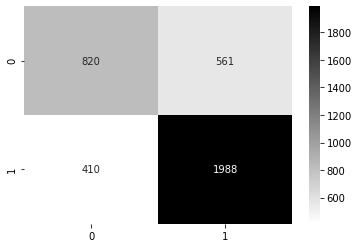

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='binary');

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63      1381
           1       0.78      0.83      0.80      2398

    accuracy                           0.74      3779
   macro avg       0.72      0.71      0.72      3779
weighted avg       0.74      0.74      0.74      3779



In [67]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████████████████████████| 29/29 [1:05:38<00:00, 135.82s/it]


In [68]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.75,0.72,0.72,0.75,36.70
LGBMClassifier,0.76,0.72,0.72,0.75,3.05
AdaBoostClassifier,0.75,0.72,0.72,0.75,17.49
BernoulliNB,0.72,0.71,0.71,0.72,2.62
LogisticRegression,0.74,0.71,0.71,0.74,3.44
RandomForestClassifier,0.74,0.71,0.71,0.74,31.11
ExtraTreesClassifier,0.73,0.70,0.70,0.73,66.82
BaggingClassifier,0.72,0.70,0.70,0.72,16.25
NuSVC,0.74,0.70,0.70,0.73,1728.79


In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [59]:
nn = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [63]:
y_pred = nn.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.653612066684308

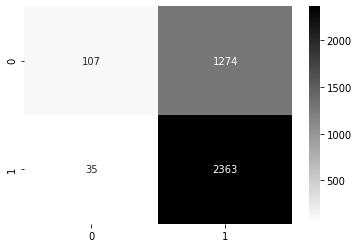

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='binary');

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.08      0.14      1381
           1       0.65      0.99      0.78      2398

    accuracy                           0.65      3779
   macro avg       0.70      0.53      0.46      3779
weighted avg       0.69      0.65      0.55      3779

